# MLSC - Mid-Course Project
### Abdallah Fekry Mohammed

---

## Task
Deliverables:
- Download the data from Kaggle using the given link
- Extract the data
- Assess the data and write down in the notebook as much as issues found as possible
- Clean the data
- Based on your findings and insights, write 6 to 12 business questions and answer them in code

Note: you can find a GitHub link below that will be helpful guide to you when doing the project

---

# <Center>**Used Cars EDA**</Center>

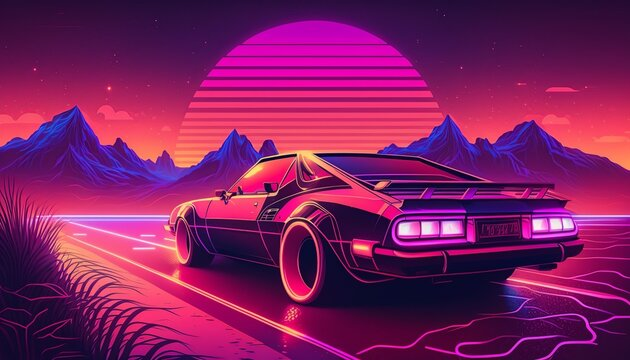

---

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("/kaggle/input/craigslist-carstrucks-data/vehicles.csv")
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [7]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [7]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [8]:
df.shape

(426880, 26)

In [9]:
df.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

### Remove the 'county' and 'size' columns as all of its data are Null

In [8]:
# Remove the 'county' and 'size' columns as all of its data are Null
df.drop(labels="county", axis=1, inplace=True)
df.drop(labels="size", axis=1, inplace=True)
df.shape

(426880, 24)

### Columns Information

In [9]:
# "int64"
# "object"
# "float64"
for c in df.columns:
    if df[c].dtype == "object":  # dicrete data
        print("Column Name:",c)
        print("Type: Discrete")
        print("Number of Null:",df[c].isnull().sum())
        print("Mode:",df[c].mode(dropna=True)[0])
        print("_"*30)
    else:  # Numeric Data
        print("Column Name:",c)
        print("Type: Numeric")
        print("Number of Null:",df[c].isnull().sum())
        print("Mean: ",df[c].mean())
        print("_"*30)

Column Name: id
Type: Numeric
Number of Null: 0
Mean:  7311486634.224333
______________________________
Column Name: url
Type: Discrete
Number of Null: 0
Mode: https://abilene.craigslist.org/ctd/d/abilene-2002-bmw-x5/7307679724.html
______________________________
Column Name: region
Type: Discrete
Number of Null: 0
Mode: columbus
______________________________
Column Name: region_url
Type: Discrete
Number of Null: 0
Mode: https://spokane.craigslist.org
______________________________
Column Name: price
Type: Numeric
Number of Null: 0
Mean:  75199.0331873126
______________________________
Column Name: year
Type: Numeric
Number of Null: 1205
Mean:  2011.23519116697
______________________________
Column Name: manufacturer
Type: Discrete
Number of Null: 17646
Mode: ford
______________________________
Column Name: model
Type: Discrete
Number of Null: 5277
Mode: f-150
______________________________
Column Name: condition
Type: Discrete
Number of Null: 174104
Mode: good
_______________________

## Drop the 70 rows that havn't a description

In [10]:
df.shape

(426880, 24)

In [11]:
df.dropna(subset='description', axis=0, inplace=True)
df.shape

(426810, 24)

## Filling the null values by the mean for numeric values and mode for dicrete values

In [17]:
for c in df.columns:
    if df[c].isnull().sum() == 0:
        continue
    if df[c].dtype == "object":  # dicrete data
        df[c].fillna(df[c].mode(dropna=True)[0], inplace=True)
    else:  # Numeric Data
        df[c].fillna(df[c].mean(), inplace=True)
df.isnull().sum()

id              0
url             0
region          0
region_url      0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
type            0
paint_color     0
image_url       0
description     0
state           0
lat             0
long            0
posting_date    0
dtype: int64

---

## Convert year column from float to intiger

In [13]:
df.year.dtype

dtype('float64')

In [18]:
df2 = df
df2.year = df2.year.astype(int)
df2.year.dtype

dtype('int64')

In [19]:
del df2

In [20]:
df.year = df.year.astype(int)
df.year.dtype

dtype('int64')

## Check for outliers

In [21]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'type', 'paint_color', 'image_url',
       'description', 'state', 'lat', 'long', 'posting_date'],
      dtype='object')

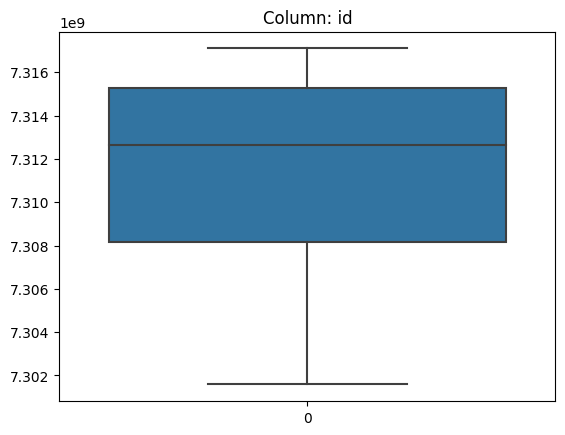

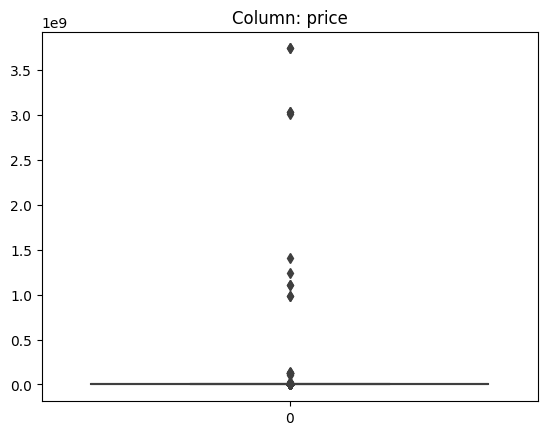

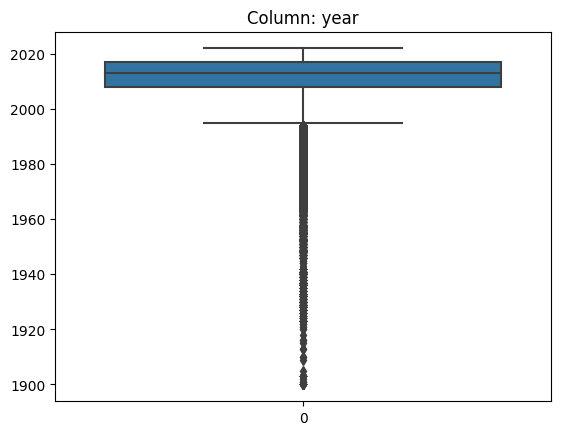

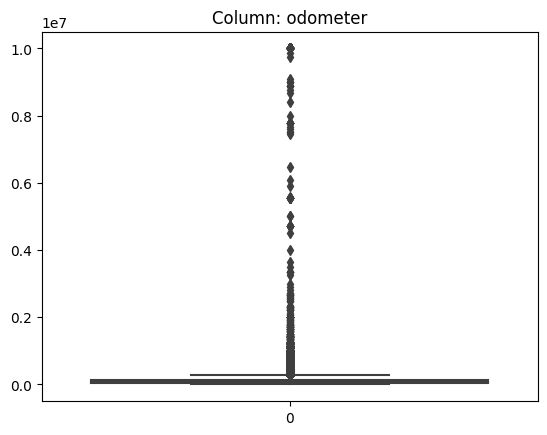

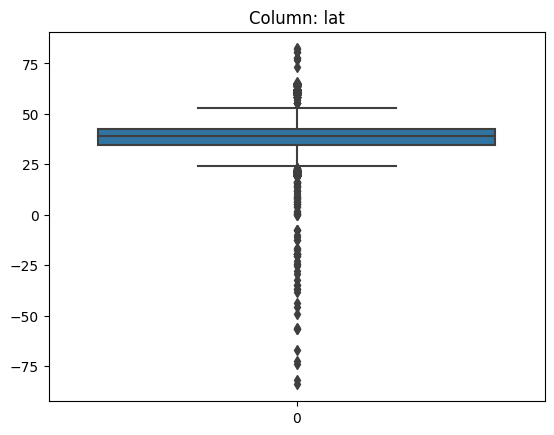

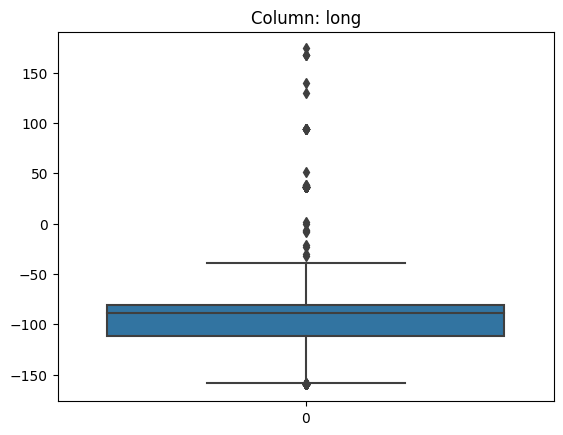

In [22]:
for c in df.columns:
    if df[c].dtype != 'object':
        sns.boxplot([df[c]])
        plt.title(f"Column: {c}")
        plt.show()

In [50]:
def resolve_outliers(df,c):
    Q1 = df[c].quantile(0.25)
    Q3 = df[c].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[~((df[c] < lower_bound) | (df[c] > upper_bound))]
    sns.boxplot([df[c]])
    plt.title(f"Cleaned Column: {c}")
    plt.show()
    return df

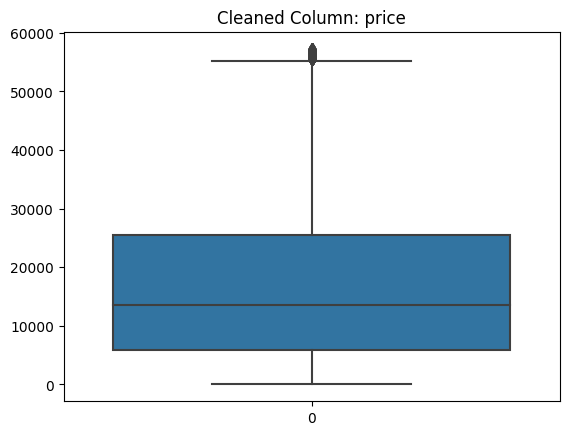

In [35]:
df = resolve_outliers(df, 'price')

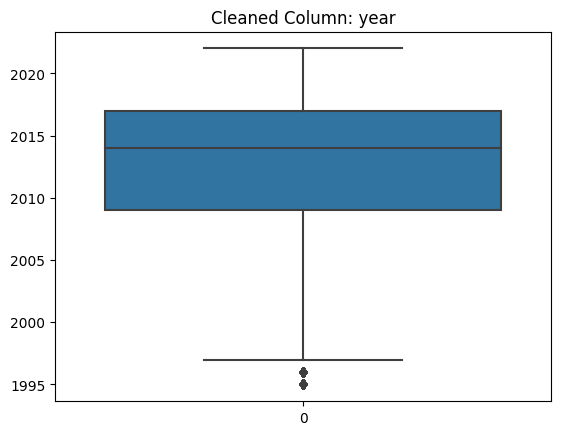

In [51]:
df = resolve_outliers(df, 'year')

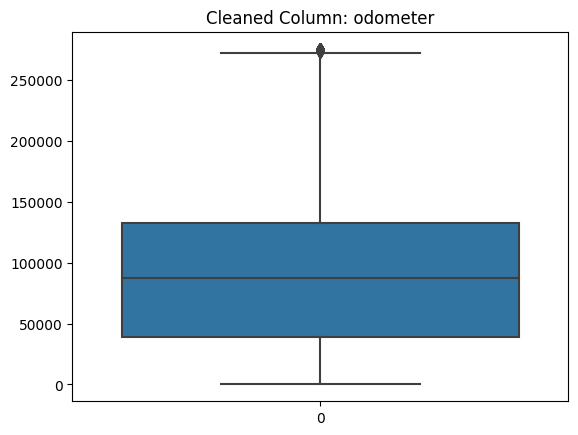

In [52]:
df = resolve_outliers(df, 'odometer')

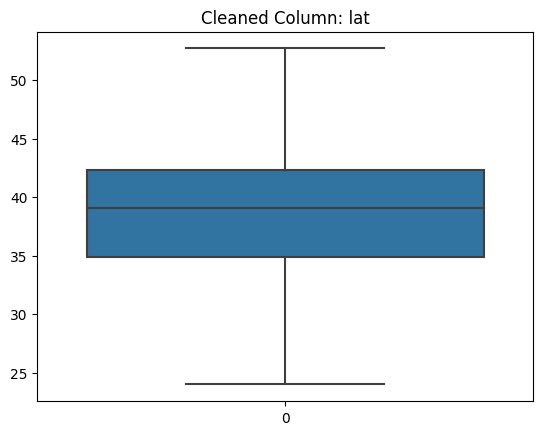

In [53]:
df = resolve_outliers(df, 'lat')

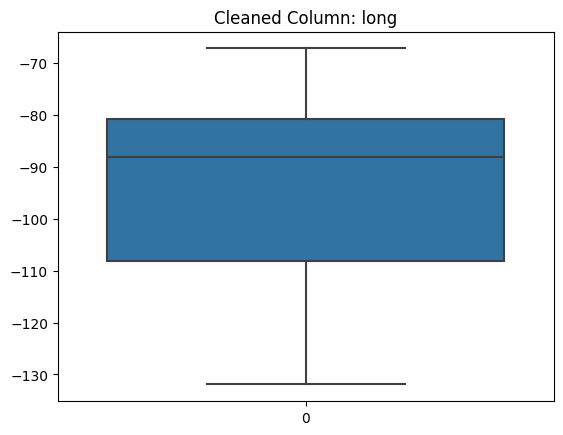

In [54]:
df = resolve_outliers(df, 'long')

In [55]:
# Cleaned data shape
df.shape

(393269, 24)

---
# **Exploratory Data Analysis EDA**

In [57]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,VIN,drive,type,paint_color,image_url,description,state,lat,long,posting_date
27,7316814884,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,33590,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,...,3GTP1VEC4EG551563,4wd,pickup,white,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,2021-05-04T12:31:18-0500
28,7316814758,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,22590,2010,chevrolet,silverado 1500,good,8 cylinders,...,1GCSCSE06AZ123805,4wd,pickup,blue,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,2021-05-04T12:31:08-0500
29,7316814989,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,39590,2020,chevrolet,silverado 1500 crew,good,8 cylinders,...,3GCPWCED5LG130317,4wd,pickup,red,https://images.craigslist.org/01212_jjirIWa0y0...,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,2021-05-04T12:31:25-0500
30,7316743432,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,30990,2017,toyota,tundra double cab sr,good,8 cylinders,...,5TFRM5F17HX120972,4wd,pickup,red,https://images.craigslist.org/00x0x_1y9kIOzGCF...,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,2021-05-04T10:41:31-0500
31,7316356412,https://auburn.craigslist.org/cto/d/auburn-uni...,auburn,https://auburn.craigslist.org,15000,2013,ford,f-150 xlt,excellent,6 cylinders,...,1FMJU1JT1HEA52352,rwd,truck,black,https://images.craigslist.org/00404_l4loxHvdQe...,2013 F-150 XLT V6 4 Door. Good condition. Leve...,al,32.592,-85.5189,2021-05-03T14:02:03-0500


In [58]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'type', 'paint_color', 'image_url',
       'description', 'state', 'lat', 'long', 'posting_date'],
      dtype='object')

## What is the company that have the more expensive car price

In [83]:
company = df.manufacturer[df.price.max()]
print("The more expensive car is belongs to:",company.capitalize())

The more expensive car is belongs to: Honda


In [180]:
del company

---
## What is the most popular car type in chicago

In [79]:
# By getting the mode for the 

model = (df.manufacturer[df.region=='chicago'] + ": " + df.model[df.region=='chicago']).mode()[0]
print("Company: Model")
print(model)

Company: Model
ford: f-150


In [181]:
del model

---
## What is the most popular condition

<Axes: ylabel='count'>

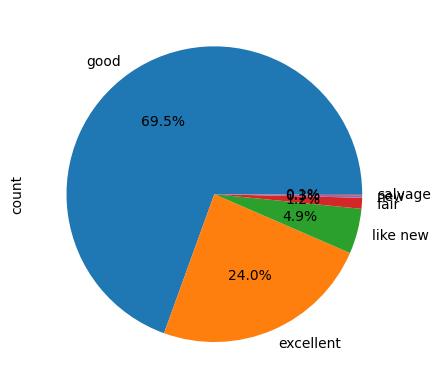

In [73]:
df['condition'].value_counts().plot(kind='pie',autopct='%1.1f%%')

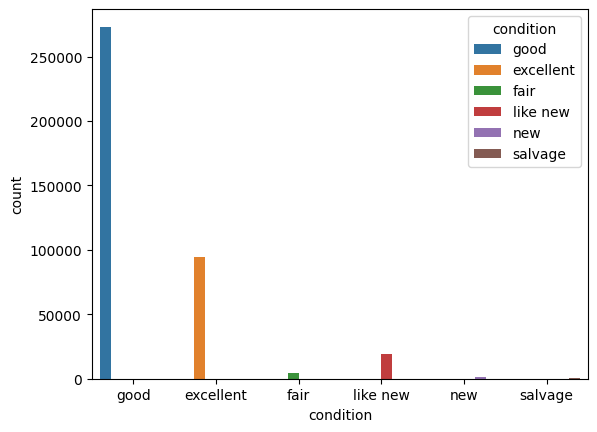

In [74]:
sns.countplot(x= 'condition' , data =df , hue= 'condition');

---
## Which countries have the highest number of car brands

In [103]:
len(df.manufacturer[df.region=='chicago'].unique())

37

In [109]:
r = []
n = []
for i in df.region.unique():
    number_of_unique_types = len(df.manufacturer[df.region==i].unique())
    r.append(i)
    n.append(number_of_unique_types)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: >

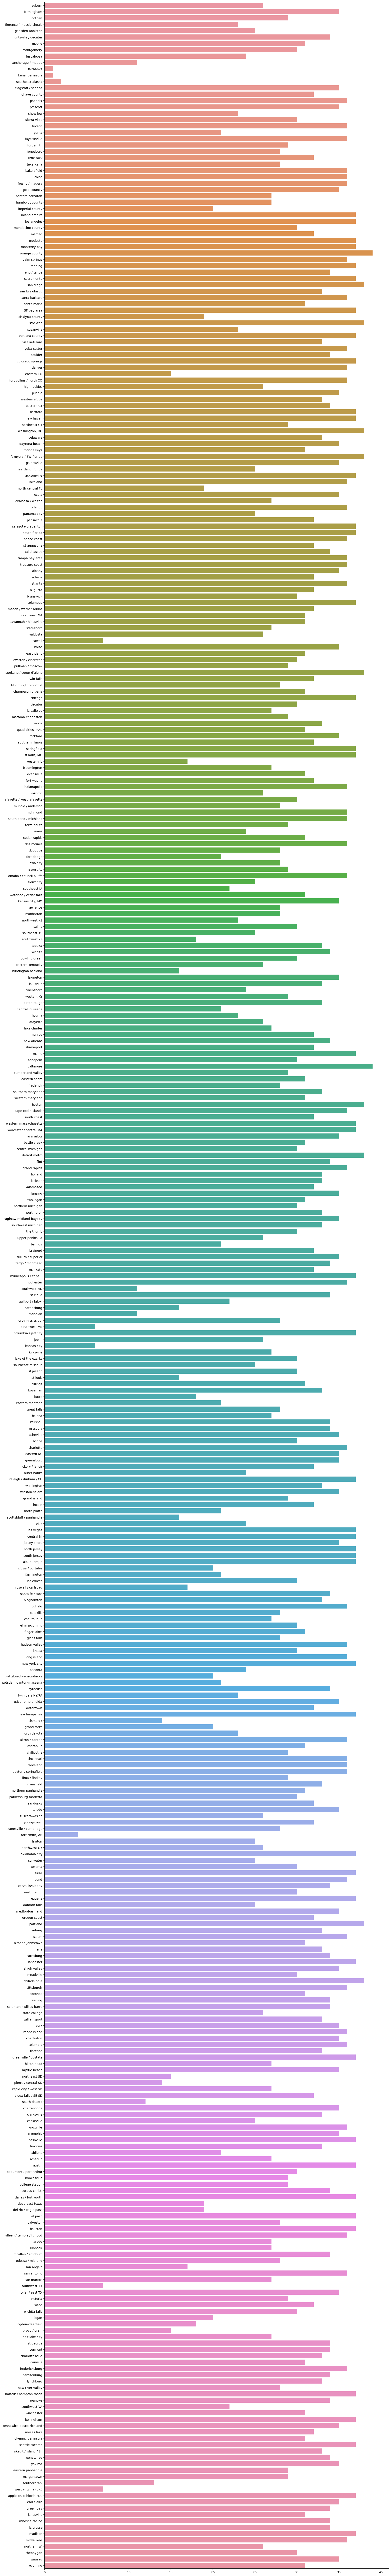

In [118]:
plt.figure(figsize=(20,150))
sns.barplot(y=r, x=n)

In [121]:
n.index(max(n))

39

In [125]:
aprint("The maximum country have car brands:",r[n.index(max(n))])

The maximum country have car brands: orange county


In [179]:
del r
del n

---
## Does the year of production affect the price?
Lets check

In [138]:
df.manufacturer.unique()

array(['gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi',
       'volkswagen', 'porsche', 'kia', 'rover', 'mini', 'pontiac', 'fiat',
       'tesla', 'saturn', 'mercury', 'harley-davidson', 'ferrari',
       'aston-martin', 'land rover', 'morgan'], dtype=object)

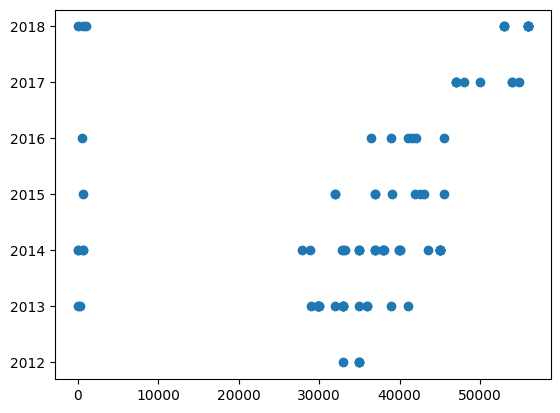

In [145]:
plt.scatter(df.price[(df.manufacturer=='tesla') & (df.model=='model s')][:10000], df.year[(df.manufacturer=='tesla') & (df.model=='model s')][:10000])

<Axes: >

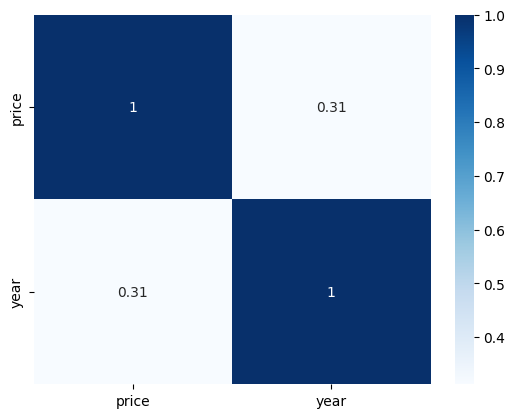

In [153]:
sns.heatmap(df[['price','year']][(df.manufacturer=='tesla') & (df.model=='model s')].corr(), annot=True, cmap='Blues')

### Answer is no there in so relation between the year and the price even when compaire with the same model and manufacturer

---
## Does the there is a relation between the condition and the price?
Lets check with the same manufacturer and model

In [169]:
df2 = df
df2['condition'] = df2['condition'].astype('category').cat.codes
df2['condition']

27        2
28        2
29        2
30        2
31        0
         ..
426875    2
426876    2
426877    2
426878    2
426879    2
Name: condition, Length: 393269, dtype: int8

<Axes: >

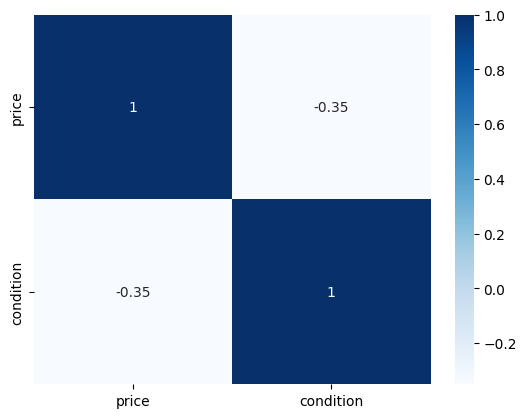

In [170]:
sns.heatmap(df2[['price','condition']][(df2.manufacturer=='tesla') & (df2.model=='model s')].corr(), annot=True, cmap='Blues')

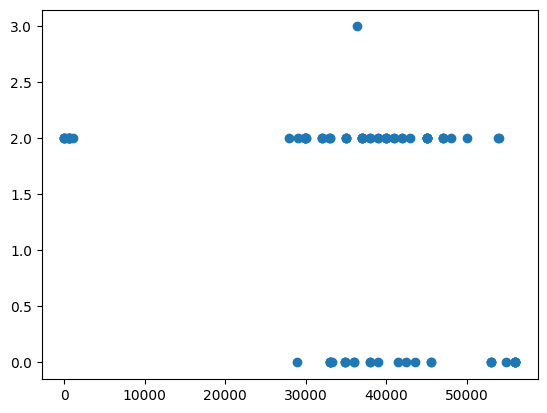

In [174]:
plt.scatter(df2.price[(df2.manufacturer=='tesla') & (df2.model=='model s')][:10000], df2.condition[(df2.manufacturer=='tesla') & (df2.model=='model s')][:10000])

In [176]:
del df2

---
## How much models for each manufacturer?

In [184]:
brands = []
n_models = []
for i in df.manufacturer.unique():
    number_of_unique_models = len(df.model[df.manufacturer==i].unique())
    brands.append(i)
    n_models.append(number_of_unique_models)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


Text(0, 0.5, 'Manufacturers')

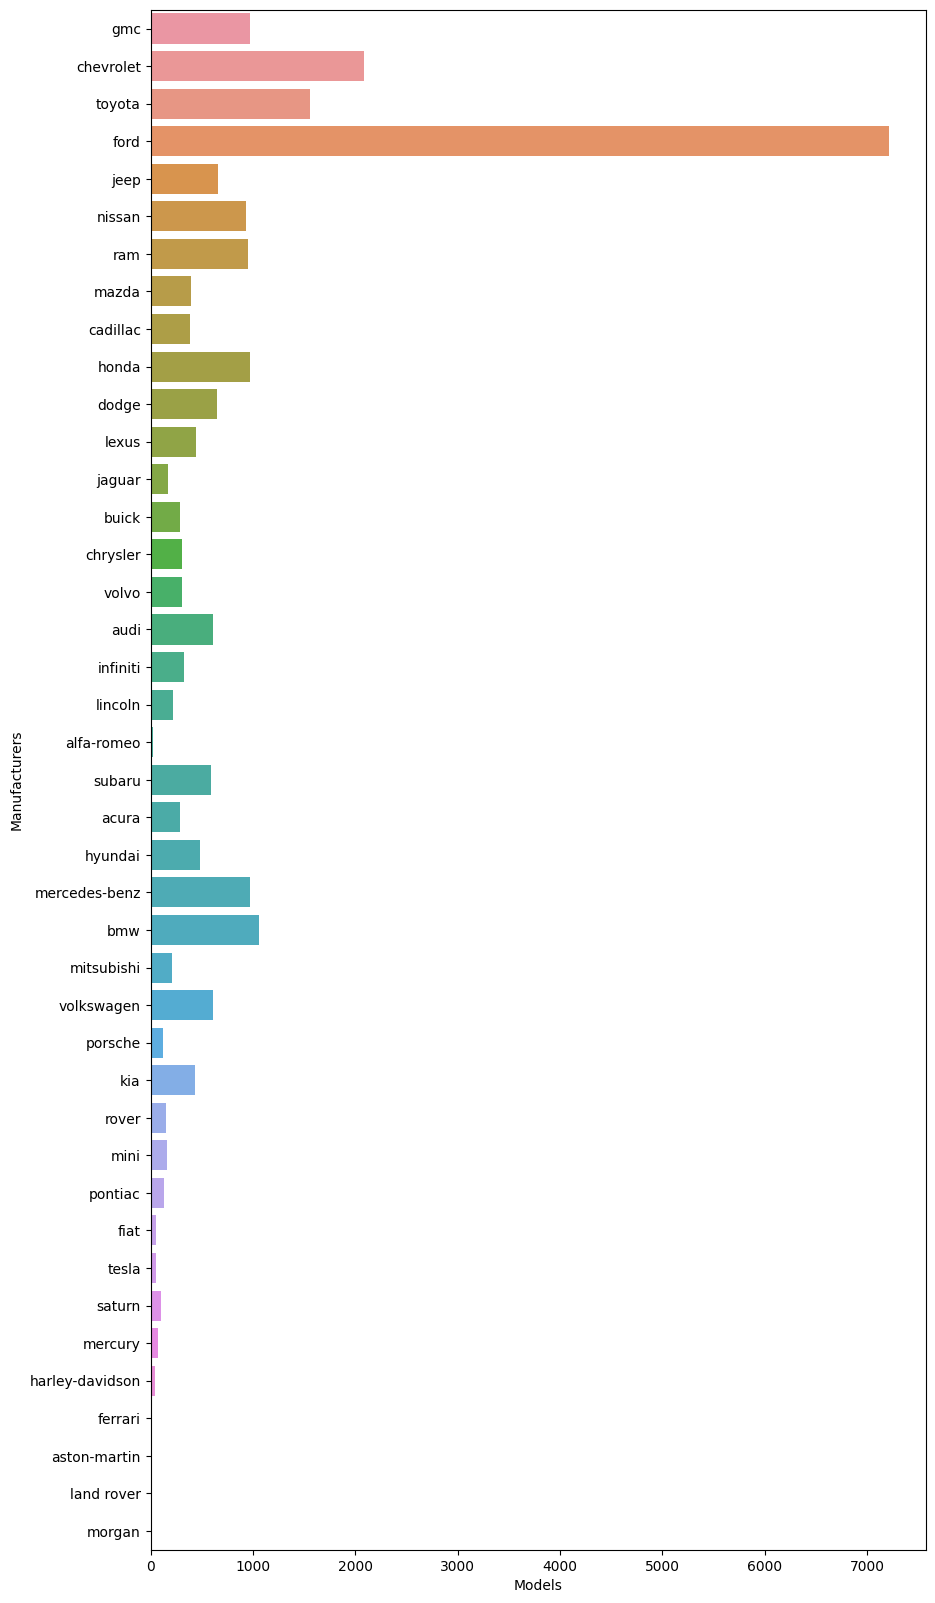

In [187]:
plt.figure(figsize=(10,20))
sns.barplot(y=brands, x=n_models)
plt.xlabel("Models")
plt.ylabel("Manufacturers")

### Answer is Ford

---